# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import itertools

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_folder = "https://raw.githubusercontent.com/cdriscoll92/CS-109A-Final-Project/master/data/"
# local_data_folder = '/Users/poojatyagi/Dropbox (MIT)/CS 109A Final project/Data'
local_data_folder = "/Users/colleendriscoll/Dropbox/Classes/CS 109A/CS 109A Final project/data/"

In [3]:
combined_data = pd.read_csv(local_data_folder + "combined_data.csv")
combined_data[:10]

,year,dist_id,dem_vote_share,congress,icpsr,nominate_dim1,nominate_dim2,nokken_poole_dim1,nokken_poole_dim2,age,...,senate,median_HH_income,median_age,mortgage_cost,unemp_rate,bachelor_deg_perc,black_perc,HS_diploma_perc,white_perc,redistricted
0,2006,AK_1,0.414254,109.0,14066.0,0.279,0.014,0.367,-0.047,73.0,...,0.484848,25793.0,33.5,1015.0,9.4,0.107839,0.032051,0.177972,0.686767,0.0
1,2008,AK_1,0.472837,110.0,14066.0,0.279,0.014,0.291,0.269,75.0,...,0.500000,30271.0,33.0,1166.0,7.7,0.108886,0.036257,0.164006,0.691129,0.0
2,2010,AK_1,0.306755,111.0,14066.0,0.279,0.014,0.242,0.642,77.0,...,0.581633,28202.0,33.8,1167.0,9.6,0.116734,0.034610,0.159744,0.674308,0.0
3,2012,AK_1,0.309172,112.0,14066.0,0.279,0.014,0.338,-0.052,79.0,...,0.520408,29932.0,33.8,1239.0,7.8,0.108769,0.035829,0.178108,0.665188,0.0
4,2014,AK_1,0.445620,113.0,14066.0,0.279,0.014,0.265,0.116,81.0,...,0.540816,31557.0,33.3,1258.0,7.6,0.116235,0.033649,0.179152,0.656391,0.0
5,2016,AK_1,0.417197,114.0,14066.0,0.279,0.014,0.291,0.205,83.0,...,0.448980,31981.0,33.5,1278.0,8.0,0.122472,0.032017,0.180522,0.644155,0.0
6,2018,AK_1,0.458323,115.0,14066.0,0.279,0.014,0.271,0.325,85.0,...,0.469388,31686.0,34.5,1285.0,7.6,0.116849,0.029883,0.179958,0.641875,0.0
7,2006,AL_1,0.318440,109.0,20300.0,0.367,0.513,0.382,0.239,47.0,...,0.484848,20810.0,37.0,686.0,6.3,0.083976,0.279771,0.236152,0.682812,0.0
8,2008,AL_1,0.000000,110.0,20300.0,0.367,0.513,0.401,0.393,49.0,...,0.500000,22473.0,37.3,736.0,7.2,0.097215,0.270287,0.221705,0.685659,0.0
9,2010,AL_1,0.000000,111.0,20300.0,0.367,0.513,0.340,0.680,51.0,...,0.581633,21250.0,38.4,763.0,12.8,0.098489,0.282178,0.218399,0.673739,0.0


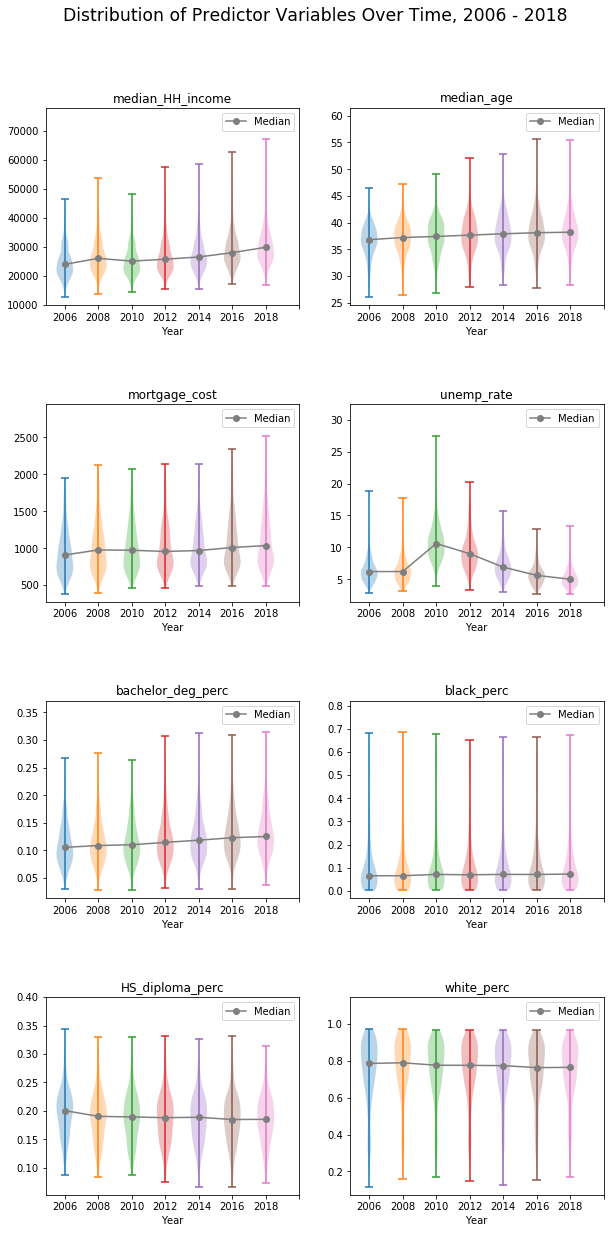

In [4]:
violin_plot_vars = ['median_HH_income', 'median_age','mortgage_cost',
                    'unemp_rate', 'bachelor_deg_perc', 'black_perc',
                    'HS_diploma_perc', 'white_perc']

years = combined_data.year.unique()

col_n, row_n = 2,4

fig, ax  = plt.subplots(nrows=row_n, ncols=col_n, figsize=(5*col_n,5*row_n))
fig.suptitle("Distribution of Predictor Variables Over Time, 2006 - 2018",
            y = 0.95, fontsize = "xx-large")
fig.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.2, hspace=0.5)
ax = ax.flatten()
for i, var in enumerate(violin_plot_vars):
    medians = []
    medians_x = []
    for j, y in enumerate(years):
        violin_plot_data = combined_data[var][combined_data.year == y]
        medians_x.append(j)
        medians.append(np.median(violin_plot_data.values))
        ax[i].violinplot(violin_plot_data.values,
                         positions = [j])
    ax[i].plot(medians_x, medians, "o-", label = "Median")
    ax[i].set_xticks([0,1,2,3,4,5,6,7])
    ax[i].set_xticklabels(years)
    ax[i].set_title(var)
    ax[i].set_xlabel("Year")
    min_val = np.min(combined_data[var])
    max_val = np.max(combined_data[var])
    min_max_range = max_val - min_val
    ax[i].set_ylim(min_val - 0.05*min_max_range,
                  max_val + 0.2*min_max_range)
    ax[i].legend()

In [5]:
combined_data.columns

Index(['year', 'dist_id', 'dem_vote_share', 'congress', 'icpsr',
       'nominate_dim1', 'nominate_dim2', 'nokken_poole_dim1',
       'nokken_poole_dim2', 'age', 'dem_incumbent', 'dem_prior_vote_share',
       'president', 'house', 'senate', 'median_HH_income', 'median_age',
       'mortgage_cost', 'unemp_rate', 'bachelor_deg_perc', 'black_perc',
       'HS_diploma_perc', 'white_perc', 'redistricted'],
      dtype='object')

## EDA

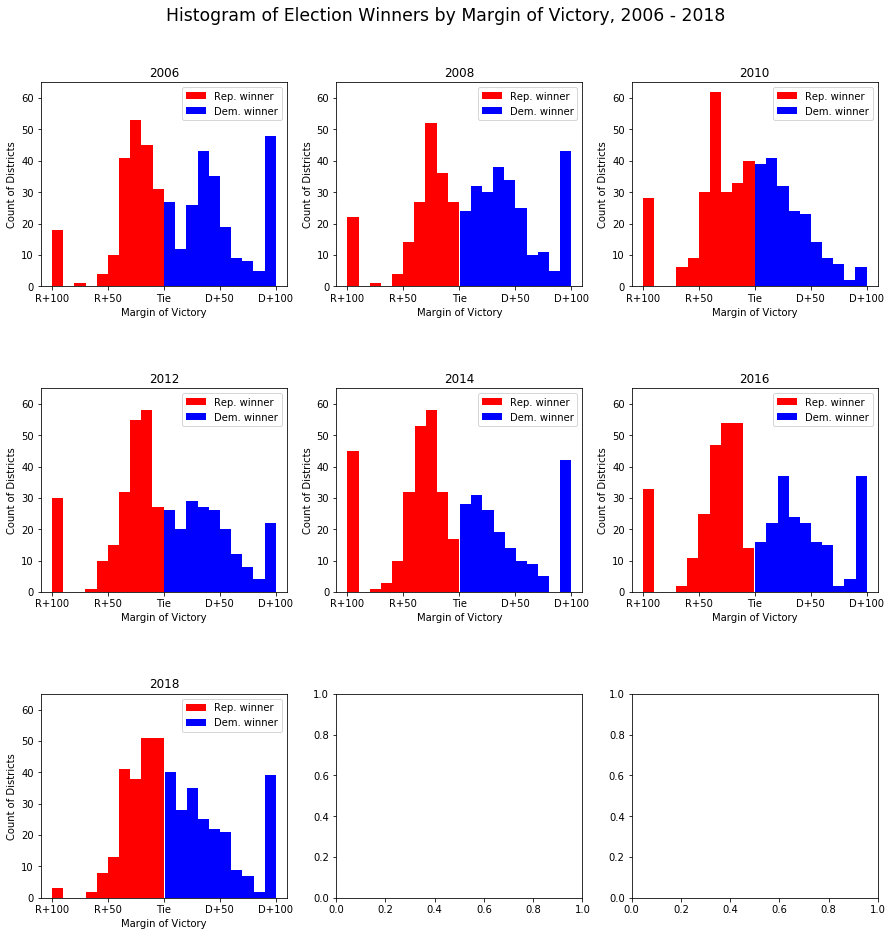

In [6]:
col_n, row_n = 3,3

fig, ax  = plt.subplots(nrows=row_n, ncols=col_n, figsize=(5*col_n,5*row_n))
fig.suptitle("Histogram of Election Winners by Margin of Victory, 2006 - 2018",
            y = 0.95, fontsize = "xx-large")
fig.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.2, hspace=0.5)
ax = ax.flatten()
for i, year in enumerate(combined_data.year.unique()):
    histogram_values = combined_data.dem_vote_share[
        combined_data.year == year].values
    republican_winners = [x for x in histogram_values if x < 0.5]
    democrat_winners = [x for x in histogram_values if x >= 0.5]
    ax[i].hist(republican_winners, color = "red",
                           label = "Rep. winner")
    ax[i].hist(democrat_winners, color = "blue",
                           label = "Dem. winner")
    ax[i].set_ylim(0, 65)
    ax[i].set_title(year)
    ax[i].set_xlabel("Margin of Victory")
    ax[i].set_ylabel("Count of Districts")
    ax[i].set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax[i].set_xticklabels(["R+100", "R+50", "Tie","D+50","D+100"])
    ax[i].legend()
plt.show();



In [7]:
combined_data[:5]

,year,dist_id,dem_vote_share,congress,icpsr,nominate_dim1,nominate_dim2,nokken_poole_dim1,nokken_poole_dim2,age,...,senate,median_HH_income,median_age,mortgage_cost,unemp_rate,bachelor_deg_perc,black_perc,HS_diploma_perc,white_perc,redistricted
0,2006,AK_1,0.414254,109.0,14066.0,0.279,0.014,0.367,-0.047,73.0,...,0.484848,25793.0,33.5,1015.0,9.4,0.107839,0.032051,0.177972,0.686767,0.0
1,2008,AK_1,0.472837,110.0,14066.0,0.279,0.014,0.291,0.269,75.0,...,0.500000,30271.0,33.0,1166.0,7.7,0.108886,0.036257,0.164006,0.691129,0.0
2,2010,AK_1,0.306755,111.0,14066.0,0.279,0.014,0.242,0.642,77.0,...,0.581633,28202.0,33.8,1167.0,9.6,0.116734,0.034610,0.159744,0.674308,0.0
3,2012,AK_1,0.309172,112.0,14066.0,0.279,0.014,0.338,-0.052,79.0,...,0.520408,29932.0,33.8,1239.0,7.8,0.108769,0.035829,0.178108,0.665188,0.0
4,2014,AK_1,0.445620,113.0,14066.0,0.279,0.014,0.265,0.116,81.0,...,0.540816,31557.0,33.3,1258.0,7.6,0.116235,0.033649,0.179152,0.656391,0.0


## Baseline model
Mathematically, this is: $P(D_{win} =1) = (1+e^{-\beta X + c})^{-1}$, where $\beta$ is composed of the combined results of each election between 2006 and 2016.

In [8]:
combined_data.columns

Index(['year', 'dist_id', 'dem_vote_share', 'congress', 'icpsr',
       'nominate_dim1', 'nominate_dim2', 'nokken_poole_dim1',
       'nokken_poole_dim2', 'age', 'dem_incumbent', 'dem_prior_vote_share',
       'president', 'house', 'senate', 'median_HH_income', 'median_age',
       'mortgage_cost', 'unemp_rate', 'bachelor_deg_perc', 'black_perc',
       'HS_diploma_perc', 'white_perc', 'redistricted'],
      dtype='object')

In [9]:
# Fit logistic regression on training data 

## Extracting 2016 data to use as training outcome
results_2016 = combined_data[combined_data.year == 2016]\
[['dist_id', 'year', 'dem_vote_share']]

results_2016.columns = ['dist_id', 'year', 'dem_vote_share_2016']
results_2016['dem_won_2016'] = np.round(results_2016.dem_vote_share_2016)
results_2016 = results_2016.drop('dem_vote_share_2016', axis = 1,
                                inplace = False)

train_data = combined_data[combined_data.year <2018]

train_data = pd.merge(train_data, results_2016[['dist_id', 'dem_won_2016']],
                     how = "left", on = 'dist_id')

results_2016 = train_data[train_data.year == 2016][['dist_id','dem_vote_share']]
results_2016.columns = ['dist_id', 'dem_vote_share_2016']

train_data = pd.merge(train_data, results_2016,
                     how = "left", on = "dist_id")

train_data = train_data.drop("dem_vote_share", axis = 1,
                            inplace = False)
train_data[:5]

,year,dist_id,congress,icpsr,nominate_dim1,nominate_dim2,nokken_poole_dim1,nokken_poole_dim2,age,dem_incumbent,...,median_age,mortgage_cost,unemp_rate,bachelor_deg_perc,black_perc,HS_diploma_perc,white_perc,redistricted,dem_won_2016,dem_vote_share_2016
0,2006,AK_1,109.0,14066.0,0.279,0.014,0.367,-0.047,73.0,0,...,33.5,1015.0,9.4,0.107839,0.032051,0.177972,0.686767,0.0,0.0,0.417197
1,2008,AK_1,110.0,14066.0,0.279,0.014,0.291,0.269,75.0,0,...,33.0,1166.0,7.7,0.108886,0.036257,0.164006,0.691129,0.0,0.0,0.417197
2,2010,AK_1,111.0,14066.0,0.279,0.014,0.242,0.642,77.0,0,...,33.8,1167.0,9.6,0.116734,0.034610,0.159744,0.674308,0.0,0.0,0.417197
3,2012,AK_1,112.0,14066.0,0.279,0.014,0.338,-0.052,79.0,0,...,33.8,1239.0,7.8,0.108769,0.035829,0.178108,0.665188,0.0,0.0,0.417197
4,2014,AK_1,113.0,14066.0,0.279,0.014,0.265,0.116,81.0,0,...,33.3,1258.0,7.6,0.116235,0.033649,0.179152,0.656391,0.0,0.0,0.417197


In [10]:
train_data.to_csv(local_data_folder + 'train_data.csv',
                 index = False)

In [11]:
## Dropping unnecessary columns
cols_to_drop_for_train = ['dist_id', 'congress', 'icpsr']

# Fit logistic regression on training data 
data_to_fit_base = train_data.drop(cols_to_drop_for_train,
                                      axis = 1,
                                      inplace = False)
data_to_fit_base = data_to_fit_base.dropna(inplace = False)
data_to_fit_base.columns

Index(['year', 'nominate_dim1', 'nominate_dim2', 'nokken_poole_dim1',
       'nokken_poole_dim2', 'age', 'dem_incumbent', 'dem_prior_vote_share',
       'president', 'house', 'senate', 'median_HH_income', 'median_age',
       'mortgage_cost', 'unemp_rate', 'bachelor_deg_perc', 'black_perc',
       'HS_diploma_perc', 'white_perc', 'redistricted', 'dem_won_2016',
       'dem_vote_share_2016'],
      dtype='object')

In [12]:
## TRAINING SETS
x_train = data_to_fit_base
y_train = x_train.dem_won_2016.values


In [13]:
logreg_base = LogisticRegression(C=100000)
logreg_base.fit(x_train.dem_prior_vote_share.values.reshape(-1, 1),
            y_train)

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [14]:
# Make Prediction and check the accuracy
y_train_probs=(logreg_base.predict_proba(x_train.dem_prior_vote_share\
                                     .values.reshape(-1, 1)))

train_accuracy = logreg_base.score(x_train.dem_prior_vote_share\
                               .values.reshape(-1, 1),
                            y_train)*100

print('Accuracy of baseline logistic regression classifier on train set: ',
      np.round(train_accuracy, 2), "%", sep = "")


Accuracy of baseline logistic regression classifier on train set: 81.57%


In [15]:
## Test results
y_test_continuous = combined_data[combined_data.year == 2018]['dem_vote_share']
y_test = np.round(y_test_continuous, 0)
x_test = combined_data[combined_data.year == 2018]['dem_prior_vote_share']

test_accuracy = logreg_base.score(x_test.values.reshape(-1, 1),
                                  y_test)*100

print('Accuracy of baseline logistic regression classifier on test set: ',
      np.round(test_accuracy, 2), "%", sep = "")

y_test_predict_probs=(logreg_base.predict_proba(x_test.values.reshape(-1, 1)))
y_test_predict_bool = (logreg_base.predict(x_test.values.reshape(-1, 1)))

Accuracy of baseline logistic regression classifier on test set: 86.9%


In [16]:
## True outcomes:

x_train_true = x_train['dem_prior_vote_share'].values
y_train_true = x_train['dem_vote_share_2016'].values

print(len(x_train_true) == len(y_train_true))

True


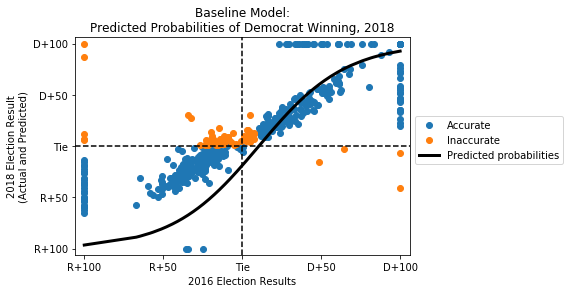

In [20]:

# Plot predicted probabilities
accurate = np.where(y_test_predict_bool == y_test.values)
inaccurate = np.where(y_test_predict_bool != y_test.values)
## Data
plt.plot(x_test.values[accurate],
         y_test_continuous.values[accurate], "o",
        label = "Accurate")
plt.plot(x_test.values[inaccurate],
         y_test_continuous.values[inaccurate], "o",
        label = "Inaccurate")
plt.plot(x_test.values[np.argsort(y_test_predict_probs[:,1])],
         y_test_predict_probs[:,1][np.argsort(y_test_predict_probs[:,1])],
         '-',linewidth = 3, color = "k",
         label='Predicted probabilities')
## 50% lines
plt.axhline(0.5, linestyle = "--", color = "black")
plt.axvline(0.5, linestyle = "--", color = "black")
plt.xlabel('2016 Election Results')
plt.ylabel('2018 Election Result\n(Actual and Predicted)')
plt.title('Baseline Model:\nPredicted Probabilities of Democrat Winning, 2018')
plt.xticks([0, 0.25, 0.5, 0.75, 1],
          ["R+100", "R+50", "Tie","D+50","D+100"])
plt.yticks([0, 0.25, 0.5, 0.75, 1],
          ["R+100", "R+50", "Tie","D+50","D+100"])
plt.xlim(-0.03, 1.03)
plt.ylim(-0.03, 1.03)
plt.legend(bbox_to_anchor=(1, 0.66))
plt.show();

In [31]:
left_bound = 255
right_bound = left_bound + 1
y_test_predict_probs[:,1][np.argsort(y_test_predict_probs[:,1])]
print(x_test.values[np.argsort(y_test_predict_probs[:,1])][right_bound])

0.5541502813410495


## Adding to the Baseline Model

In [115]:
def add_power_terms(df, continuous_colnames, degree):
    if degree > 2 & degree % 1 == 0:
        for i in range(2, degree+1):
            for col in continuous_colnames:
                new_colname = col+"^"+str(i)
                df[new_colname] = df[col]**i
    else:
        if degree == 1:
            return(df)
        else:
            print("Invalid degree term")
    return(df)

def add_interaction_terms(df, continuous_colnames):
    binary_colnames = df.columns.difference(continuous_colnames)
    ## removing power terms
    binary_colnames = [x for x in binary_colnames if "^" not in x]
    
    for continuous_colname in continuous_colnames:
        for binary_colname in binary_colnames:
            interaction_colname = continuous_colname + "*" + binary_colname
            df[interaction_colname] = df[continuous_colname]*df[binary_colname]
    return(df)


In [117]:
x_train.columns

Index(['year', 'nominate_dim1', 'nominate_dim2', 'nokken_poole_dim1',
       'nokken_poole_dim2', 'age', 'dem_incumbent', 'dem_prior_vote_share',
       'president', 'house', 'senate', 'median_HH_income', 'median_age',
       'mortgage_cost', 'unemp_rate', 'bachelor_deg_perc', 'black_perc',
       'HS_diploma_perc', 'white_perc', 'dem_won_2016', 'dem_vote_share_2016'],
      dtype='object')

In [136]:
## Dropping dem_vote_share_2016 from training data
drop_cols = ['dem_vote_share_2016', 'dem_won_2016']
y_train = x_train.dem_won_2016.values
x_train = x_train.drop(drop_cols, axis = 1, inplace = False)
## Normalizing

In [137]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(x_train)
x_train_scaled = pd.DataFrame(min_max_scaler.transform(x_train))
x_train_scaled.columns = x_train.columns
x_train_scaled.columns

Index(['year', 'nominate_dim1', 'nominate_dim2', 'nokken_poole_dim1',
       'nokken_poole_dim2', 'age', 'dem_incumbent', 'dem_prior_vote_share',
       'president', 'house', 'senate', 'median_HH_income', 'median_age',
       'mortgage_cost', 'unemp_rate', 'bachelor_deg_perc', 'black_perc',
       'HS_diploma_perc', 'white_perc'],
      dtype='object')

In [138]:
## Year * dem_vote_share
x_train_scaled['year*dem_prior_vote_share'] = x_train_scaled['year'] *\
x_train_scaled['dem_prior_vote_share']

In [139]:
## Splitting training and validation

tts_out = train_test_split(x_train_scaled, y_train,
                           test_size = 0.2,
                           random_state = 90,
                           stratify=x_train_scaled['year'])
x_train_scaled, x_val_scaled, y_train, y_val = tts_out

In [140]:
## Two options: One where NOMINATE scores are included;
## Second where Nokken/Poole scores are included


drop_cols1 = ['nokken_poole_dim1','nokken_poole_dim2']
drop_cols2 = ['nominate_dim1', 'nominate_dim2']
drop_cols = [drop_cols1, drop_cols2]


drop_cols

[['nokken_poole_dim1', 'nokken_poole_dim2'],
 ['nominate_dim1', 'nominate_dim2']]

In [201]:
poly_degree_max = 20
poly_degrees = range(1, poly_degree_max)
L2_penalties = [10**i for i in range(0,7,2)]

hyperparams = list(itertools.product(\
    *[L2_penalties,
      drop_cols,
     poly_degrees]))

In [142]:
hyperparams[0]

(1, ['nokken_poole_dim1', 'nokken_poole_dim2'], 1)

In [143]:
def get_design_mats(df, dropped_columns,
                    binary_columns, poly_degree):
    df_reduced = df.drop(dropped_columns, axis = 1,
                                  inplace = False)
    
    continuous_cols = [x for x in df_reduced.columns.values if \
                      x not in binary_columns]
    
    df_power = add_power_terms(df_reduced,
                               continuous_cols,
                               poly_degree)

    df_to_fit = add_interaction_terms(df_power,
                                      continuous_cols)
    return(df_to_fit)

In [144]:
def run_logit(x_train, x_val, y_train, y_val,
              hyperparams, binary_cols):
    
    C_i = hyperparams[0]
    dropped_cols = hyperparams[1]
    poly_degree = hyperparams[2]
    
    x_train_to_fit = get_design_mats(x_train, dropped_cols,
                                     binary_cols,
                                   poly_degree)
    x_val_to_fit = get_design_mats(x_val, dropped_cols,
                                   binary_cols,
                                   poly_degree)
    
    logit_obj = LogisticRegression(C=C_i)
    logit_obj.fit(x_train_to_fit,y_train)
    
    train_score = logit_obj.score(x_train_to_fit, y_train)
    val_score = logit_obj.score(x_val_to_fit, y_val)
    
    return(logit_obj, train_score, val_score)


In [202]:
logit_objects = []
train_scores = []
val_scores = []
for hp in hyperparams:
    logit_i = run_logit(x_train_scaled, x_val_scaled,
                        y_train, y_val,
                        hp, binary_cols = ['dem_incumbent'])
    logit_objects.append(logit_i[0])
    train_scores.append(logit_i[1])
    val_scores.append(logit_i[2])
            

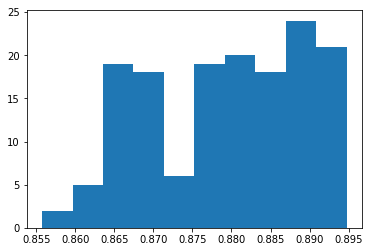

In [203]:
plt.hist(val_scores);

In [204]:
best_model_hps = hyperparams[np.argmax(val_scores)]
print("The model that performs best on cross-validation uses ",
      "L2 penalization term ",
      10**(-1*best_model_hps[0]),
      ", drops columns ", best_model_hps[1],
      ", and is of degree ", best_model_hps[2], sep = "")

The model that performs best on cross-validation uses L2 penalization term 0.0, drops columns ['nokken_poole_dim1', 'nokken_poole_dim2'], and is of degree 18


In [205]:
hyperparams_df = pd.DataFrame(hyperparams)
scores_df = pd.DataFrame(val_scores)
hyperparams_and_scores_df = pd.concat([hyperparams_df, scores_df], axis = 1)
hyperparams_and_scores_df.columns = ['L2 term', 'dropped_cols', 'degree', 
                                    'validation_score']
hyperparams_and_scores_df.sort_values(by="validation_score",ascending=False)
# hyperparams_and_scores_df[:5]

,L2 term,dropped_cols,degree,validation_score
122,1000000,"[nokken_poole_dim1, nokken_poole_dim2]",9,0.894737
93,10000,"[nokken_poole_dim1, nokken_poole_dim2]",18,0.894737
124,1000000,"[nokken_poole_dim1, nokken_poole_dim2]",11,0.894737
132,1000000,"[nokken_poole_dim1, nokken_poole_dim2]",19,0.894737
94,10000,"[nokken_poole_dim1, nokken_poole_dim2]",19,0.894737
138,1000000,"[nominate_dim1, nominate_dim2]",6,0.892788
105,10000,"[nominate_dim1, nominate_dim2]",11,0.892788
92,10000,"[nokken_poole_dim1, nokken_poole_dim2]",17,0.892788
121,1000000,"[nokken_poole_dim1, nokken_poole_dim2]",8,0.892788
107,10000,"[nominate_dim1, nominate_dim2]",13,0.892788


In [206]:
renamed_ideology_vars = []
for i in range(len(hyperparams_and_scores_df)):
    if "nominate" in hyperparams_and_scores_df.dropped_cols.values[i][0]:
        renamed_ideology_vars.append("nominate")
    else:
        renamed_ideology_vars.append("nokken-poole")
hyperparams_and_scores_df.dropped_cols = renamed_ideology_vars

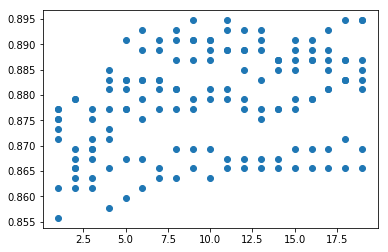

In [207]:
plt.plot(hyperparams_and_scores_df.degree,
         hyperparams_and_scores_df.validation_score,
        "o")

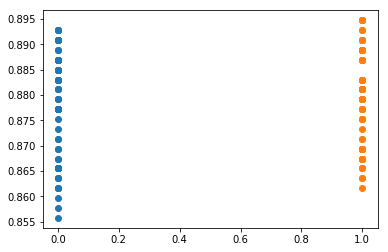

In [208]:
subset_0 = hyperparams_and_scores_df[hyperparams_and_scores_df.dropped_cols == "nominate"]
subset_1 = hyperparams_and_scores_df[hyperparams_and_scores_df.dropped_cols == "nokken-poole"]
plt.plot([0 for i in range(len(subset_0))],
         subset_0.validation_score,
        "o")
plt.plot([1 for i in range(len(subset_1))],
         subset_1.validation_score,
        "o");

In [209]:
from scipy import stats
t_test_ideology = stats.ttest_ind(subset_0.validation_score,
                                   subset_1.validation_score)
print(t_test_ideology)

Ttest_indResult(statistic=-1.3439512602514823, pvalue=0.18099341220447002)


In [ ]:
## Test set
x_test = combined_data[combined_data.year == 2018]
y_test = x_test.